In [1]:
import numpy as np
import matplotlib.pyplot as plt

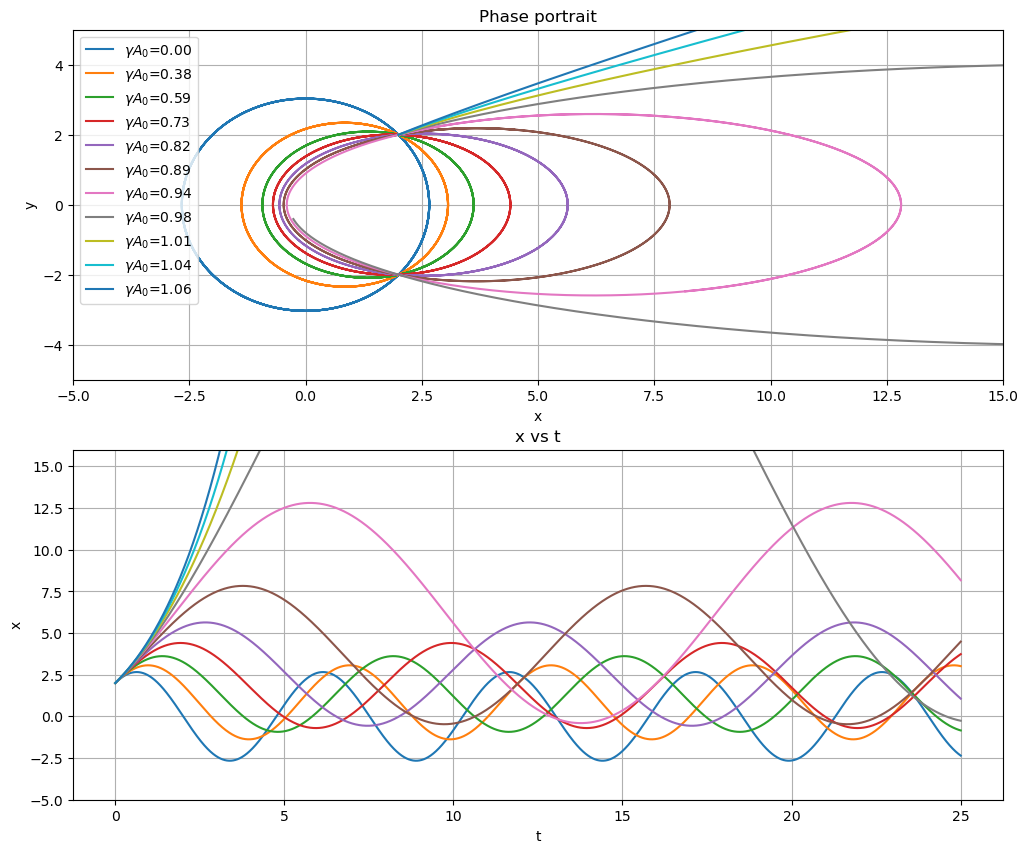

In [35]:


w=1.3
r=-0.2

def f(t,x,y):
    return y

def g(t,x,y):
    return -(w*x/(1+(r*x)))+(r*y*y/(1+(r*x)))

fig1,axs = plt.subplots(2,1,figsize=(12,10))
while(r<1.8):
    r+=.2
    h=.005
    t=0
    x=2
    y=2
    m=1/((1+r*x)**2)
    
    if r==0:
        gamma = 0
    else:
        W=(w)/(2*r*r)
        E=0.5*((m*y*y)+(m*w*x*x))
        gamma=np.sqrt(E/W)
    t_arr=np.array([0])
    x_arr=np.array([2])
    y_arr=np.array([2])
    while(t<=25.0):
        k1=h*f(t,x,y)
        m1=h*g(t,x,y)
        k2=h*f(t+h/2.0,x+k1/2.0,y+m1/2.0)
        m2=h*g(t+h/2.0,x+k1/2.0,y+m1/2.0)
        k3=h*f(t+h/2.0,x+k2/2.0,y+m2/2.0)
        m3=h*g(t+h/2.0,x+k2/2.0,y+m2/2.0)
        k4=h*f(t+h,x+k3,y+m3)
        m4=h*g(t+h,x+k3,y+m3)
        x=x+(k1+2*k2+2*k3+k4)/6.0
        y=y+(m1+2*m2+2*m3+m4)/6.0
        t=t+h
        t_arr=np.append(t_arr,t)
        x_arr=np.append(x_arr,x)
        y_arr=np.append(y_arr,y)
#plt.plot(t_arr,x_arr,label='x vs t plot')
    axs[0].plot(x_arr,y_arr,label="$\gamma A_{0}$=%.2f"%gamma)
    axs[1].plot(t_arr,x_arr)
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend()
axs[0].set_title("Phase portrait")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
    #plt.xticks([0,4,8,12,16,20,24])
    #plt.yticks([-4,-2,0,2,4,6])
    
axs[0].set_xlim(-5,15)
axs[0].set_ylim(-5,5)   
axs[1].set_ylim(-5,16)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
axs[1].set_title("x vs t")
fig1.savefig('phase_potrait.png')
plt.show()


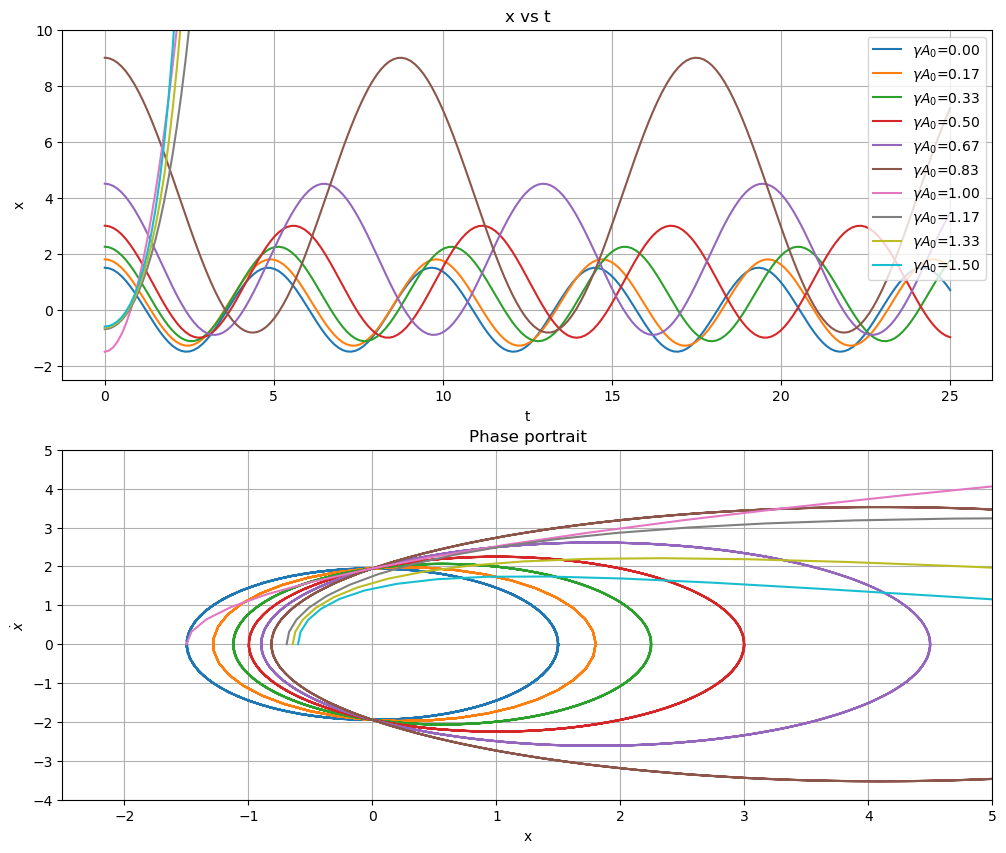

In [55]:
omeg = 1.3
A0 = 1.5
gamm = np.linspace(0,1.0,10)

t1 = np.linspace(0,25,200)
fig,axs = plt.subplots(2,1,figsize=(12,10))
for i in gamm:
    def_par = i*A0
    if def_par<1:
        Ome = omeg*np.sqrt(1-def_par**2)
        A_ga = A0/(1-def_par**2)
        x_t = A_ga*(np.cos(Ome*t1)+def_par)
        v_t = -A_ga*Ome*np.sin(Ome*t1)
        axs[0].plot(t1,x_t,label = '$\gamma A_{0}$=%.2f'%def_par)
        axs[1].plot(x_t,v_t)
    elif def_par==1:
        x_t = A0*(omeg**2*t1**2-1)
        v_t = A0*omeg**2*t1
        axs[0].plot(t1,x_t,label = '$\gamma A_{0}$=%.2f'%def_par)
        axs[1].plot(x_t,v_t)
    else:
        Ome = omeg*np.sqrt(def_par**2-1)
        A_ga = A0/(1-def_par**2)
        x_t = A_ga*(-np.cosh(Ome*t1)+def_par)
        v_t = -A_ga*Ome*np.sin(Ome*t1)
        axs[0].plot(t1,x_t,label = '$\gamma A_{0}$=%.2f'%def_par)
        axs[1].plot(x_t,v_t)

axs[0].legend()
axs[0].grid()
axs[0].set_ylim(-2.5,10)
axs[1].set_xlim(-2.5,5)
axs[1].set_ylim(-4,5)
axs[0].set_title('x vs t')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[1].set_title('Phase portrait')
axs[1].set_xlabel('x')
axs[1].set_ylabel('$\dot{x}$')
axs[1].grid()
fig.savefig('Analytic_phase.png',dpi=250)


(-0.6666666666666666, 15.0)

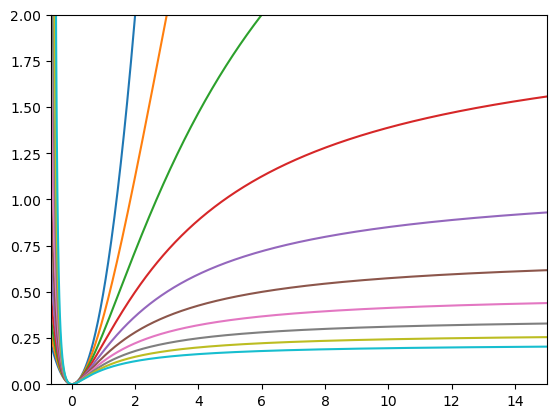

In [56]:
x=np.linspace(-5,15,1000)
w=1.0

def V(r,x):
    m=1./(1+(r*x))**2
    return 0.5*(m*w*x*x)
n=10
r=np.linspace(0,1.5,n)
for i in range(n):
    R=r[i]
    plt.plot(x,V(R,x),label='$\gamma$=%.2f'%R)

plt.ylim(0,2)
plt.xlim(-1/np.max(r),15)    